<a href="https://colab.research.google.com/github/jennyked/A-B-test-Fast-food-marketing-campaign-project/blob/main/A_B_test_Fast_food_marketing_compaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import statsmodels.stats.api as sms
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_1samp, shapiro, levene, f_oneway, kruskal
import io

warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving WA_Marketing-Campaign.csv to WA_Marketing-Campaign.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['WA_Marketing-Campaign.csv']))
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [4]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

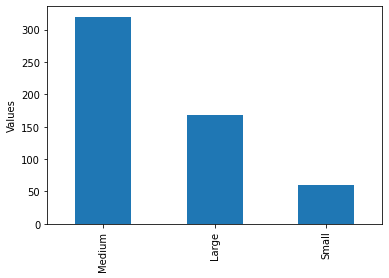

In [6]:
df["MarketSize"].value_counts().plot(kind = "bar", ylabel = 'Values')


In [9]:
market_sales =  df.groupby('MarketSize')[['SalesInThousands']].agg(['mean','sum','count'])
market_sales

SalesInThousands                
                       mean       sum count
MarketSize                                 
Large             70.116726  11779.61   168
Medium            43.985344  14075.31   320
Small             57.409333   3444.56    60

In [ ]:
#checking how many store were involved in promotion

In [12]:
promotion_market = df.groupby('Promotion')['MarketSize'].agg(['count'])
promotion_market

,count
Promotion,
1,172
2,188
3,188


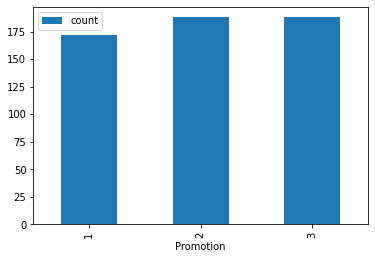

In [13]:
promotion_market.plot.bar()

Conclusion

All three promotions were 'almost' evenly distributed among three random markets. The only thing here is that the first promotion was less 'actively' used compared to the second and third ones.

In [44]:
#to check which marketsize is more popular among all markets by the promotion column

market_size_promo = df_bar = df.groupby(['Promotion','MarketSize']).size().to_frame().reset_index()



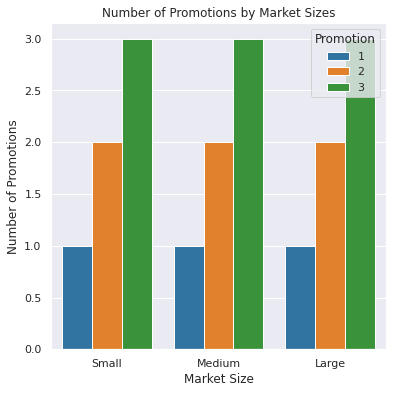

In [48]:


sns.set_theme()
plt.figure(figsize=(6,6))
ax = sns.barplot(x='MarketSize', y='Promotion',hue='Promotion', 
                 data=market_size_promo, hue_order=[1,2,3], palette='tab10', order=['Small', 'Medium','Large'])
# ax.set(xlabel='Promotion Type', ylabel='Number of Stores')
plt.xlabel('Market Size')
plt.ylabel('Number of Promotions')
plt.legend(title='Promotion')
plt.title('Number of Promotions by Market Sizes')
plt.show()

Applying A/B Testing

In [30]:
## Comparing Promotion 1,2 and 3
#Normality Assumption

promotion1_sale = df[df['Promotion'] == 1]['SalesInThousands']
promotion2_sale = df[df['Promotion'] == 2]['SalesInThousands']
promotion3_sale = df[df['Promotion'] == 3]['SalesInThousands']



In [31]:
stats.f_oneway(promotion1_sale, promotion2_sale, promotion3_sale)

F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)

## Conclusion

The test output yields an F-statistic of 21.95, and the p-value is 6.766*10^-10, indicating a significant promotion effect on sales revenue. The p-value is significant at a 99% confidence level.

In [33]:
from scipy import stats
from scipy.stats import ttest_ind

In [34]:
## Comparing Promotion 1 and 2

promotion_1 = df[df["Promotion"] == 1]
promotion_2 = df[df["Promotion"] == 2]

p1_vs_p2 = ttest_ind(promotion_1["SalesInThousands"], promotion_2["SalesInThousands"])

print(p1_vs_p2)

Ttest_indResult(statistic=6.453671702181005, pvalue=3.5506696512134566e-10)


# Conclusion

Comparing promotion 1 and 2

p-value is much lower than the threshold 0.05 which means the null hypothesis can be rejected and there is a statistical difference between the two promotion types

t-test shows that there is a significant degree of difference between the groups and promotion 1 generates more sales then promotion 2.

In [35]:
## Comparing Promotion 1 and 3

promotion_1 = df[df["Promotion"] == 1]
promotion_3 = df[df["Promotion"] == 3]

p1_vs_p3 = ttest_ind(promotion_1["SalesInThousands"], promotion_3["SalesInThousands"])

print(p1_vs_p3)

Ttest_indResult(statistic=1.5551383687293547, pvalue=0.12079667272313273)


# Conclusion

Comparing promotion 1 and 3

p-value is much higher than the threshold 0.05 which means the null hypothesis cannot be rejected and there is no statistical difference between the two promotion types

In [36]:
## Comparing Promotion 2 and 3

promotion_2 = df[df["Promotion"] == 2]
promotion_3 = df[df["Promotion"] == 3]

p2_vs_p3 = ttest_ind(promotion_2["SalesInThousands"], promotion_3["SalesInThousands"])

print(p2_vs_p3)

Ttest_indResult(statistic=-4.88139271089348, pvalue=1.562894303627738e-06)


# Conclusion

Comparing promotion 2 and 3

p-value is lower than the threshold 0.05 which means the null hypothesis can be rejected and there is a statistical difference between the two promotion types

# A/B testing conclusion

Promotion 1 and Promotion 3 both outperform promotion 2 but the difference between promotion 1 and 3 is not statistically different. Therefore, the company can use either promotion 1 or 3